# Stat 101 - WFR 2 Group 4 Data Project 1 Analysis

This work is a quick descriptive analysis from a survey conducted by Group 4 of Stat 101 - WFR 2 class. The survey comprises of a set of questions that asks on the discrepancy between budget allocations, savings, and budgetting system between dormers and non-dormers.

As this analysis is written in a Jupyter notebook, the following lines of code may look gibberish to non-coding people so I would suggest to only look on the data, graphs, and analyses provided on each step done.

# Setup

In order to 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./data/Budget Survey (Responses) - Form Responses 1.csv')
df.head()

,Timestamp,"In accordance with RA 10173 or the Data Privacy Act of 2012, all personal information gathered from this form shall be kept confidential and will only be accessed by the organizers for registration purposes.",Please indicate your student number.,Year Level,College,Course,How much is your average weekly allowance?,Are you currently residing outside of your permanent residence? (dorm/apartment/condominium),"How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Food]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Transportation]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Personal Expenses]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Miscellaneous]",Do you get to save by the end of the week?,"Are you satisfied with your budget system? (Achieving budget satisfaction means comfortably covering essentials, enjoying discretionary spending, and saving for future goals.)"
0,10/1/2023 9:18:56,Yes,2022-12666,2,College of Engineering,BS Mechanical Engineering,1.000000e-07,No,Very High Priority,High Priority,Very Low Priority,Low Priority,Yes,Completely Satisfied
1,10/1/2023 14:25:12,Yes,2022-07299,1,Virata School of Business,BA Business Administration,1.500000e+03,Yes,Very High Priority,Low Priority,High Priority,Very Low Priority,Yes,Moderately Satisfied
2,10/1/2023 21:49:30,Yes,2021-21191,2nd year,College of Science,BS Geology,1.000000e+03,No,High Priority,Very High Priority,Very Low Priority,Low Priority,Yes,Moderately Satisfied
3,10/1/2023 22:58:27,Yes,2022-06241,2nd,School of Economics,BS Economics,3.000000e+03,No,High Priority,Very Low Priority,Very High Priority,Low Priority,Yes,Completely Satisfied
4,10/2/2023 10:25:59,Yes,2021-05731,1at,College of Home Economics,BS Clothing Technology,1.100000e+03,No,Low Priority,Very High Priority,High Priority,Very Low Priority,No,Moderately Satisfied


In [25]:
df.describe(include='all')

,timestamp,data_privacy,student_number,year_level,college,course,average_weekly_allowance,dorm_residency,food_allocation_prioritization,transportation_allocation_prioritization,personal_expense_allocation_prioritization,misc_allocation_prioritization,weekly_savings,budgetting_system_satisfaction
count,25,25,25,25.000000,25,25,2.500000e+01,25,25,25,25,25,25,25
unique,25,1,24,NaN,11,22,NaN,2,3,4,4,2,2,3
top,10/1/2023 9:18:56,Yes,2022-00288,NaN,College of Engineering,BS Economics,NaN,Yes,Very High Priority,High Priority,Low Priority,Very Low Priority,Yes,Moderately Satisfied
freq,1,25,2,NaN,6,2,NaN,13,14,10,12,19,20,15
mean,NaN,NaN,NaN,2.560000,NaN,NaN,1.646000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.083205,NaN,NaN,9.237514e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.000000,NaN,NaN,1.500000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,NaN,NaN,2.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   timestamp                                   25 non-null     object 
 1   data_privacy                                25 non-null     object 
 2   student_number                              25 non-null     object 
 3   year_level                                  25 non-null     int64  
 4   college                                     25 non-null     object 
 5   course                                      25 non-null     object 
 6   average_weekly_allowance                    25 non-null     float64
 7   dorm_residency                              25 non-null     object 
 8   food_allocation_prioritization              25 non-null     object 
 9   transportation_allocation_prioritization    25 non-null     object 
 10  personal_expense

As we can see, all features contain the non-null values which means there is no need to impute values in our dataset.

## Dataset Preprocessing

In [3]:
df.columns

Index(['Timestamp',
       'In accordance with RA 10173 or the Data Privacy Act of 2012, all personal information gathered from this form shall be kept confidential and will only be accessed by the organizers for registration purposes. ',
       'Please indicate your student number.', 'Year Level', 'College',
       'Course', 'How much is your average weekly allowance?',
       'Are you currently residing outside of your permanent residence? (dorm/apartment/condominium)',
       'How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Food]',
       'How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Transportation]',
       'How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Personal Expenses]',
       'How would you rank where to allocate your budget among the f

In [4]:
df.columns = [
    'timestamp',
    'data_privacy',
    'student_number',
    'year_level',
    'college',
    'course',
    'average_weekly_allowance',
    'dorm_residency',
    'food_allocation_prioritization',
    'transportation_allocation_prioritization',
    'personal_expense_allocation_prioritization',
    'misc_allocation_prioritization',
    'weekly_savings',
    'budgetting_system_satisfaction',
]

In [5]:
df.head()

,timestamp,data_privacy,student_number,year_level,college,course,average_weekly_allowance,dorm_residency,food_allocation_prioritization,transportation_allocation_prioritization,personal_expense_allocation_prioritization,misc_allocation_prioritization,weekly_savings,budgetting_system_satisfaction
0,10/1/2023 9:18:56,Yes,2022-12666,2,College of Engineering,BS Mechanical Engineering,1.000000e-07,No,Very High Priority,High Priority,Very Low Priority,Low Priority,Yes,Completely Satisfied
1,10/1/2023 14:25:12,Yes,2022-07299,1,Virata School of Business,BA Business Administration,1.500000e+03,Yes,Very High Priority,Low Priority,High Priority,Very Low Priority,Yes,Moderately Satisfied
2,10/1/2023 21:49:30,Yes,2021-21191,2nd year,College of Science,BS Geology,1.000000e+03,No,High Priority,Very High Priority,Very Low Priority,Low Priority,Yes,Moderately Satisfied
3,10/1/2023 22:58:27,Yes,2022-06241,2nd,School of Economics,BS Economics,3.000000e+03,No,High Priority,Very Low Priority,Very High Priority,Low Priority,Yes,Completely Satisfied
4,10/2/2023 10:25:59,Yes,2021-05731,1at,College of Home Economics,BS Clothing Technology,1.100000e+03,No,Low Priority,Very High Priority,High Priority,Very Low Priority,No,Moderately Satisfied


In [6]:
df['year_level'].unique()

array(['2', '1', '2nd year', '2nd', '1at', '3rd year', 'IV', '2nd Year',
       '5th', 'Third', 'Sophomore ', '4th', '5th Year', '3rd', '3rd Year',
       '2ND YEAR'], dtype=object)

In [7]:
year_level_mapper = {
    '1': 1,
    '1at': 1,
    '2': 2,
    '2nd': 2,
    '2ND YEAR': 2,
    '2nd year': 2,
    '2nd Year': 2,
    'Sophomore ': 2,
    '3rd': 3,
    '3rd year': 3,
    '3rd Year': 3,
    'Third': 3,
    'IV': 4,
    '4th': 4,
    '5th Year': 5,
    '5th': 5,
}

In [8]:
df['year_level'] = df['year_level'].map(year_level_mapper)

In [9]:
df['year_level'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

## Data Analysis

## Demographic Analysis

Before we start things off, we can do a quick demographic analysis on Stat 101 - WFR 2 students.

In [ ]:
df.groupby(['']).count()

### Average Weekly Allowance

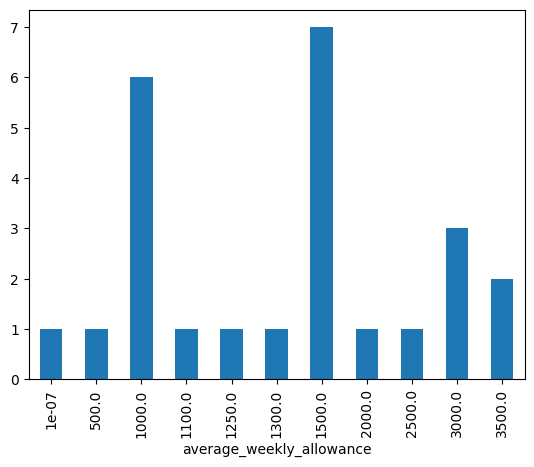

In [10]:
df.groupby(['average_weekly_allowance']).size().plot(kind='bar')
plt.show()

In [16]:
df.groupby(['average_weekly_allowance']).size().reset_index()

,average_weekly_allowance,0
0,1.000000e-07,1
1,5.000000e+02,1
2,1.000000e+03,6
3,1.100000e+03,1
4,1.250000e+03,1
5,1.300000e+03,1
6,1.500000e+03,7
7,2.000000e+03,1
8,2.500000e+03,1
9,3.000000e+03,3


In [18]:
average_weekly_allowance = df.groupby(['average_weekly_allowance']).size().reset_index()
average_weekly_allowance.set_index('average_weekly_allowance')

,0
average_weekly_allowance,
1.000000e-07,1
5.000000e+02,1
1.000000e+03,6
1.100000e+03,1
1.250000e+03,1
1.300000e+03,1
1.500000e+03,7
2.000000e+03,1
2.500000e+03,1


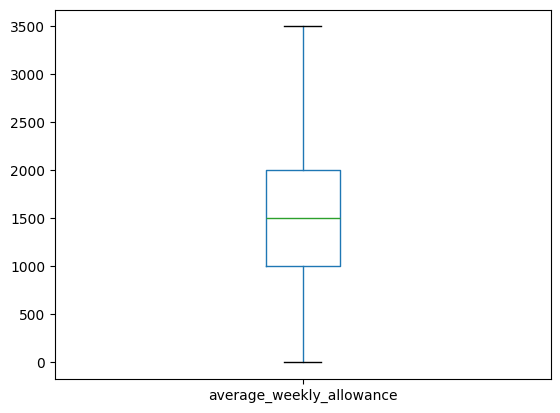

In [23]:
df.boxplot(column=['average_weekly_allowance'])
plt.grid(False)
plt.show()

The boxplot above shows that there are no outliers in average weekly allowance feature because all of the values in the dataset are within 3 standard deviations from the median but note that it is quite interesting that the minimum value for the average weekly allowance is 0 for someone who is not residing on any dormitory near UP Diliman.

The boxplot above also shows that the median value is at Php1500 and most of the input values are within the range Php1000 and Php2000.

### Dorm residency

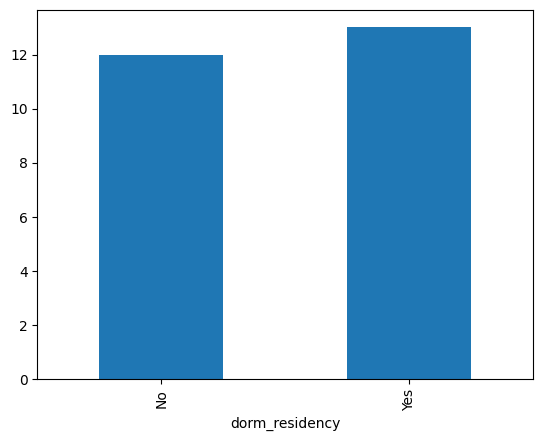

In [11]:
df.groupby(['dorm_residency']).size().plot(kind='bar')
plt.show()

As we can see, there is a pretty good discrepancy between the individuals who reside in the dorm and those who reside in their own houses.

## Expenditure Allocation

Note that the labels for the `*_allocation_prioritization` features utilizes categorical values.

### Food Allocation Prioritization

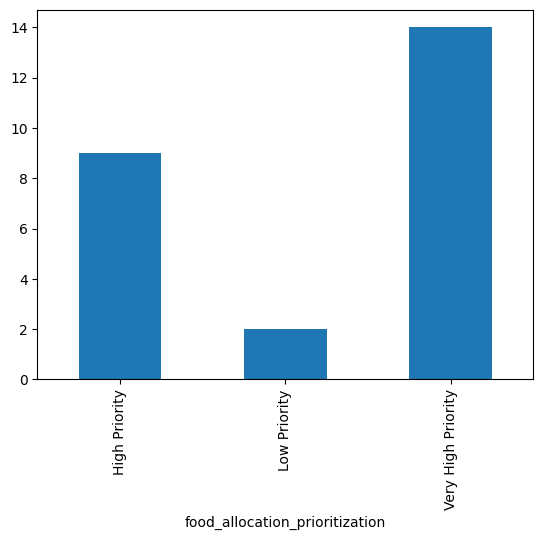

In [29]:
df.groupby(['food_allocation_prioritization']).size().plot(kind='bar')
plt.show()

### Transportation Allocation Prioritization

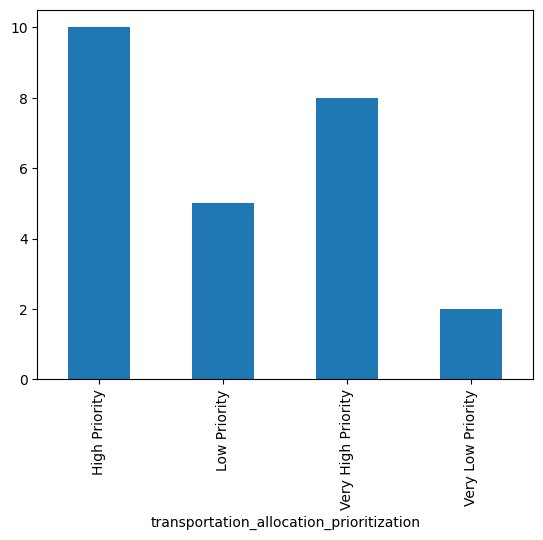

In [30]:
df.groupby(['transportation_allocation_prioritization']).size().plot(kind='bar')
plt.show()

### Personal Expenses Allocation Prioritization

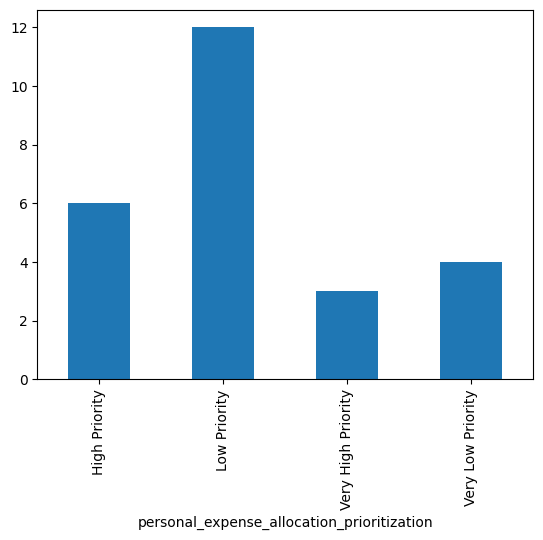

In [32]:
df.groupby(['personal_expense_allocation_prioritization']).size().plot(kind='bar')
plt.show()

### Miscellaneous Allocation Prioritization

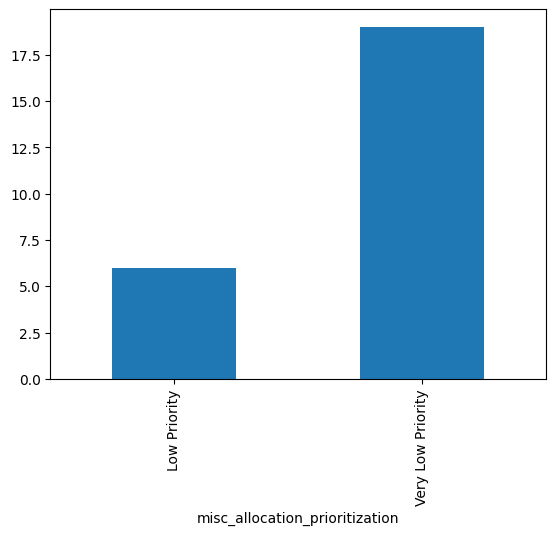

In [33]:
df.groupby(['misc_allocation_prioritization']).size().plot(kind='bar')
plt.show()

From the bar graphs shown above, we can see a very big discrepancy on how students of Stat 101 WFR - 2 allocate their budget. There are no ties between labels that could produce conflicts on which expenditure type has higher allocation.

### Weekly Savings Grouped by Dormers vs Non-dormers

In [13]:
cross_tab_weekly_savings_vs_residency = df.groupby([
    'dorm_residency',
    'weekly_savings',
]).size().reset_index()
cross_tab_weekly_savings_vs_residency.columns = ['dorm_residency', 'weekly_savings', 'count']

In [14]:
cross_tab_weekly_savings_vs_residency

,dorm_residency,weekly_savings,count
0,No,No,2
1,No,Yes,10
2,Yes,No,3
3,Yes,Yes,10


## Budgetting System Satisfaction

In [65]:
cross_tab_weekly_budgetting_system_vs_residency = df.groupby([
    'dorm_residency',
    'budgetting_system_satisfaction',
]).size().reset_index()
cross_tab_weekly_budgetting_system_vs_residency.columns = ['dorm_residency', 'budgetting_system_satisfaction', 'count']

In [66]:
cross_tab_weekly_budgetting_system_vs_residency

,dorm_residency,budgetting_system_satisfaction,count
0,No,Completely Satisfied,4
1,No,Moderately Satisfied,7
2,No,Not Satisfied,1
3,Yes,Completely Satisfied,3
4,Yes,Moderately Satisfied,8
5,Yes,Not Satisfied,2


In [67]:
ctab_bss_vs_c_yes = cross_tab_weekly_budgetting_system_vs_residency[cross_tab_weekly_budgetting_system_vs_residency['dorm_residency'] == 'Yes'][['budgetting_system_satisfaction','count']]

In [68]:
ctab_bss_vs_c_yes.set_index('budgetting_system_satisfaction', inplace=True)

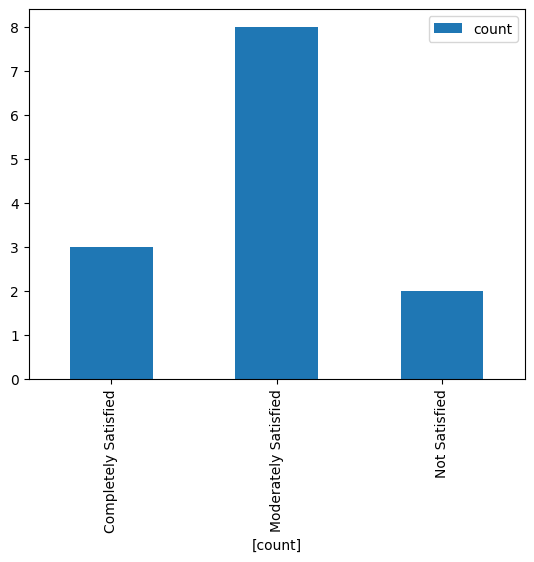

In [72]:
ctab_bss_vs_c.plot(kind='bar', xlabel=ctab_bss_vs_c_yes.columns)
plt.show()

In [70]:
ctab_bss_vs_c_no = cross_tab_weekly_budgetting_system_vs_residency[cross_tab_weekly_budgetting_system_vs_residency['dorm_residency'] == 'No'][['budgetting_system_satisfaction','count']]

In [71]:
ctab_bss_vs_c_no.set_index('budgetting_system_satisfaction', inplace=True)

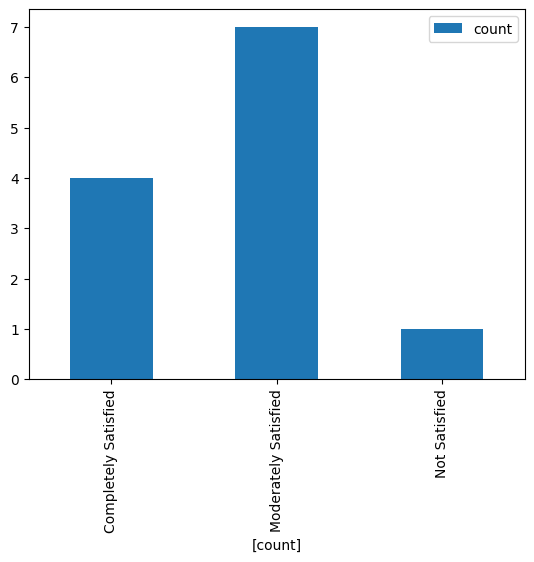

In [73]:
ctab_bss_vs_c_no.plot(kind='bar', xlabel=ctab_bss_vs_c_no.columns)
plt.show()

> Fix analyses below
> Try to add dormers vs non-dormers analyses